In [112]:
from pandas_datareader import data as pdr
import yahoo_finance as yf
import numpy as np
import pandas as pd
from sklearn import mixture as mix
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df = pdr.get_data_yahoo('SPY', '06-04-1993', '05-31-2019')
df = df[['Open','High','Low','Close']]
df['Open'] = df['Open'].shift(1)
df['High'] = df['High'].shift(1)
df['Low'] = df['Low'].shift(1)
df['Close'] = df['Close'].shift(1)
df = df[['Open','High','Low','Close']]
df = df.dropna()

In [114]:
unsup = mix.GaussianMixture(n_components = 4,
                           covariance_type ="spherical",
                           n_init = 100,
                           random_state = 42)

In [115]:
unsup.fit(np.reshape(df,(-1,df.shape[1])))
regime = unsup.predict(np.reshape(df,(-1,df.shape[1])))

In [116]:
df['Return'] = np.log(df['Close']/df['Close'].shift(1))

In [117]:
Regimes = pd.DataFrame(regime,columns=['Regime'],index=df.index)\
.join(df,how='inner')\
.assign(maarket_cu_return=df.Return.cumsum())\
.reset_index(drop=False)\
.rename(columns={'index':'Date'})

C:\Users\Karim Elbahloul\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


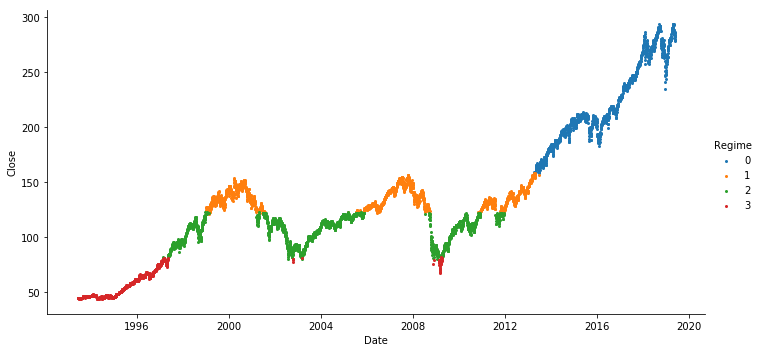

In [118]:
order=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes,hue='Regime',hue_order=order,aspect=2,size=5)
fig.map(plt.scatter,'Date','Close',s=4).add_legend()
plt.show()

In [119]:
for i in order:
    print('Mean for regime %i: '%i,unsup.means_[i][0])
    print('Co-Variancefor regime %i: '%i,(unsup.covariances_[i]))

Mean for regime 0:  222.72719857130062
Co-Variancefor regime 0:  1337.8492667989428
Mean for regime 1:  136.6809246633303
Co-Variancefor regime 1:  78.5395460408796
Mean for regime 2:  106.00493840194393
Co-Variancefor regime 2:  132.0691479309486
Mean for regime 3:  56.91504104255719
Co-Variancefor regime 3:  132.75312790639157
